In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## 1. Global Earthquakes

In [2]:
ds = pd.read_csv("usgs_earthquakes.csv")

In [3]:
ds2=ds.sort_values("mag", ascending=False)
ds2.reset_index(drop=True, inplace=True)
ds3 =ds2.loc[0:49]
ds3

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
1,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
2,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
3,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
4,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
5,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
6,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
7,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
8,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
9,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


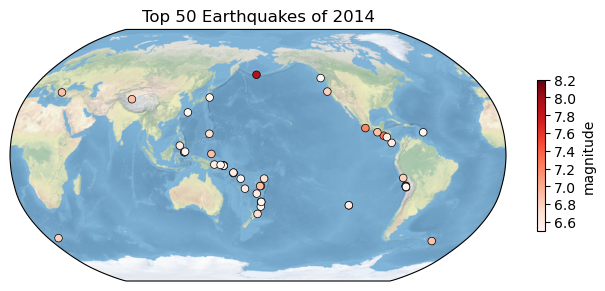

In [4]:
plt.figure(figsize=(8,5), dpi=100)
proj = ccrs.Robinson(central_longitude=180)
ax = plt.axes(projection=proj)
plt.scatter('longitude', 'latitude', data=ds3, s=30,c='mag', cmap='Reds', edgecolors='black', linewidths=0.5,transform=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
plt.colorbar(label="magnitude",shrink=0.4,ticks=[6.6,6.8,7.0,7.2,7.4,7.6,7.8,8.0,8.2])
plt.title("Top 50 Earthquakes of 2014")
plt.show()

## Explore a netCDF dataset

In [5]:
ds_2 = xr.open_mfdataset("SNDR.SNPP.CRIMSS.20201201.M01.L3_CLIMCAPS_QCC.std.v02_38.G.210225160219.nc", engine = 'netcdf4')

## 2.1

In [6]:
cmm = ds_2.co_mmr_midtrop

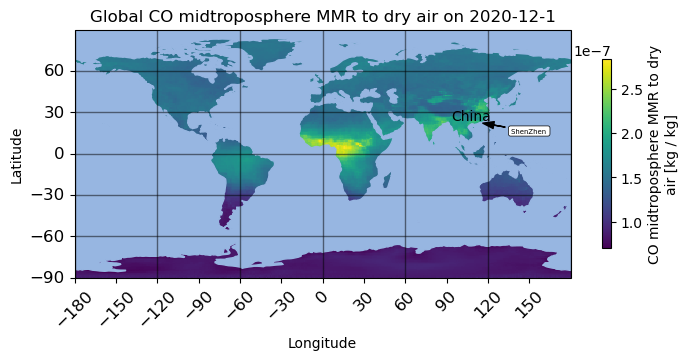

In [7]:
plt.figure(figsize=(8,5), dpi=100)
proj = ccrs.PlateCarree()
ax_2 = plt.axes(projection=proj)
plt.xticks(ticks=np.arange(-180, 180, 30), fontsize=12, rotation=45, ha='center', va='top')
plt.yticks(ticks=np.arange(-90, 90, 30), fontsize=12, rotation=0, ha='right', va='center')
ax_2.gridlines(crs=proj, linewidth=1,color='black',alpha=0.5)
ax_2.add_feature(cfeature.OCEAN, zorder=1)
cmm[0].plot(ax=ax_2, cbar_kwargs={'shrink': 0.5})
ax_2.annotate('ShenZhen ',xy=(114.06, 22.54),xytext=(150, 15),fontsize=5,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5),
             arrowprops=dict(facecolor='black', shrink=0.1, width=0.01 ,headlength=8,headwidth=5),
              horizontalalignment='center')
plt.text(108,24,"China",transform=plt.gca().transData, horizontalalignment='center', color='k')
plt.title('Global CO midtroposphere MMR to dry air on 2020-12-1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## 2.2

In [8]:
central_lon, central_lat = 114.06, 22.54
ShenZhen_cmm = cmm[0].sel(lon=slice(central_lon-10, central_lon+10),lat=slice(central_lat-10, central_lat+10))

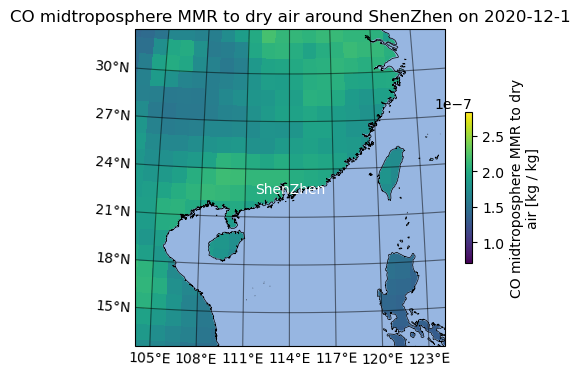

In [9]:
plt.figure(figsize=(5,5), dpi=100)
proj = ccrs.Orthographic(central_lon, central_lat) 
ax_3 = plt.axes(projection=proj)
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax_3.set_extent(extent)
ax_3.add_feature(cfeature.OCEAN, zorder=1)
cmm[0].plot(ax=ax_3, transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.4})
ax_3.coastlines(resolution='10m', linewidth=0.5)
g1=ax_3.gridlines(color='black',alpha=0.5,draw_labels=True)
g1.top_labels = False
g1.right_labels = False
plt.text(central_lon, central_lat,"ShenZhen",transform=plt.gca().transData, horizontalalignment='center', color='w')
plt.title('CO midtroposphere MMR to dry air around ShenZhen on 2020-12-1')
plt.show()